## Preprocessing

In [84]:
!pip install tensorflow

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the csv.
import pandas as pd 
airlines_df = pd.read_csv("csvs/airlines.csv")
flights_df = pd.read_csv("csvs/flights.csv")
airports_df = pd.read_csv("csvs/airports.csv")


In [85]:
print(flights_df.describe(include=['object']))

        AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT
count   1048575        1048575             1048575
unique       14            315                 315
top          WN            ATL                 ATL
freq     221586          66599               66741


In [86]:
# Drop the non-beneficial columns
flights = flights_df
flights.head

<bound method NDFrame.head of          MONTH  DAY  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT  \
0            1    1            4      AS            ANC                 SEA   
1            1    1            4      AA            LAX                 PBI   
2            1    1            4      US            SFO                 CLT   
3            1    1            4      AA            LAX                 MIA   
4            1    1            4      AS            SEA                 ANC   
...        ...  ...          ...     ...            ...                 ...   
1048570      3   10            2      EV            RDU                 EWR   
1048571      3   10            2      UA            LGA                 IAH   
1048572      3   10            2      UA            SAN                 ORD   
1048573      3   10            2      EV            MSY                 ORD   
1048574      3   10            2      MQ            CID                 ORD   

         SCHEDULED_DE

In [87]:
# Determine the number of unique values in each column.
flights.nunique()

MONTH                     3
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
ORIGIN_AIRPORT          315
DESTINATION_AIRPORT     315
SCHEDULED_DEPARTURE    1236
DEPARTURE_TIME         1434
DEPARTURE_DELAY         861
SCHEDULED_TIME          460
DISTANCE               1271
SCHEDULED_ARRIVAL      1353
ARRIVAL_TIME           1440
ARRIVAL_DELAY           883
DIVERTED                  2
dtype: int64

In [88]:
# Look at value counts for binning
counts = flights['AIRLINE'].value_counts()
counts

WN    221586
DL    147486
EV    111206
OO    107099
AA     97549
UA     87606
US     73942
MQ     65513
B6     48157
AS     29614
NK     19612
F9     14669
HA     14133
VX     10403
Name: AIRLINE, dtype: int64

In [89]:
# Choose a cutoff value and create a list of types to be replaced
# use the variable name `application_types_to_replace
flight_types_to_replace = list(counts[counts<571977].index)
flight_types_to_replace

['WN',
 'DL',
 'EV',
 'OO',
 'AA',
 'UA',
 'US',
 'MQ',
 'B6',
 'AS',
 'NK',
 'F9',
 'HA',
 'VX']

In [90]:
# Replace in dataframe
for airline in flight_types_to_replace:
    flights['AIRLINE'] = flights['AIRLINE'].replace(airline,"Other")

# Check to make sure binning was successful
flights['AIRLINE'].value_counts()

Other    1048575
Name: AIRLINE, dtype: int64

In [91]:
# Look at DAY value counts for binning
day_counts = flights['DAY'].value_counts()
day_counts

5     49180
2     49165
9     48781
4     48089
6     48024
8     46844
3     46586
1     42527
7     42056
10    32565
23    32431
16    32372
26    32331
19    32243
12    32191
20    31657
13    31656
27    31615
22    31190
25    30879
15    30428
11    30295
18    30030
21    28422
28    28407
24    28186
17    28147
14    28131
30    16080
29    16030
31    12037
Name: DAY, dtype: int64

In [92]:
# You may find it helpful to look at CLASSIFICATION value counts 
flights_to_replace = list(counts[counts<195089].index)
flights_to_replace

['DL', 'EV', 'OO', 'AA', 'UA', 'US', 'MQ', 'B6', 'AS', 'NK', 'F9', 'HA', 'VX']

In [93]:
# Convert categorical data to numeric 
flights = pd.get_dummies(flights,dtype=float)
flights.head()

MemoryError: Unable to allocate 2.46 GiB for an array with shape (315, 1048575) and data type float64

In [94]:
y = flights['ARRIVAL_DELAY'].values
y

array([-22.,  -9.,   5., ...,   3., -13.,  nan])

In [95]:
X = flights.drop('ARRIVAL_DELAY', axis=1).values
X

array([[1, 1, 4, ..., 430, 408.0, 0],
       [1, 1, 4, ..., 750, 741.0, 0],
       [1, 1, 4, ..., 806, 811.0, 0],
       ...,
       [3, 10, 2, ..., 1624, 1627.0, 0],
       [3, 10, 2, ..., 1242, 1229.0, 0],
       [3, 10, 2, ..., 1115, nan, 0]], dtype=object)

In [96]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [97]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

ValueError: could not convert string to float: 'Other'

## Compile, Train and Evaluate the Model

In [43]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=7
hidden_nodes_layer2=14
hidden_nodes_layer3=21
nn = tf.keras.models.Sequential()

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 4501      
                                                                 
 dense_1 (Dense)             (None, 14)                112       
                                                                 
 dense_2 (Dense)             (None, 1)                 15        
                                                                 
Total params: 4,628
Trainable params: 4,628
Non-trainable params: 0
_________________________________________________________________


In [45]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [46]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
20890/20890 [==============================] - 102s 5ms/step - loss: nan - accuracy: 0.0215 - val_loss: nan - val_accuracy: 0.0211
Epoch 2/100
20890/20890 [==============================] - 71s 3ms/step - loss: nan - accuracy: 0.0215 - val_loss: nan - val_accuracy: 0.0211
Epoch 3/100
20890/20890 [==============================] - 73s 3ms/step - loss: nan - accuracy: 0.0215 - val_loss: nan - val_accuracy: 0.0211
Epoch 4/100
20890/20890 [==============================] - 80s 4ms/step - loss: nan - accuracy: 0.0215 - val_loss: nan - val_accuracy: 0.0211
Epoch 5/100
20890/20890 [==============================] - 79s 4ms/step - loss: nan - accuracy: 0.0215 - val_loss: nan - val_accuracy: 0.0211
Epoch 6/100
20890/20890 [==============================] - 69s 3ms/step - loss: nan - accuracy: 0.0215 - val_loss: nan - val_accuracy: 0.0211
Epoch 7/100
20890/20890 [==============================] - 91s 4ms/step - loss: nan - accuracy: 0.0215 - val_loss: nan - val_accuracy: 0.0211
Epoch

In [47]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8192/8192 - 11s - loss: nan - accuracy: 0.0213 - 11s/epoch - 1ms/step
Loss: nan, Accuracy: 0.021282196044921875


# Start Logistic Regression

In [105]:
# Start Logistic Regression
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [119]:
flights_df = pd.read_csv("csvs/flights.csv")
flights = flights_df

flights.dropna()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,Y_N
0,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,205.0,1448,430,408.0,-22.0,0,No
1,1,1,4,AA,LAX,PBI,10,2.0,-8.0,280.0,2330,750,741.0,-9.0,0,No
2,1,1,4,US,SFO,CLT,20,18.0,-2.0,286.0,2296,806,811.0,5.0,0,No
3,1,1,4,AA,LAX,MIA,20,15.0,-5.0,285.0,2342,805,756.0,-9.0,0,No
4,1,1,4,AS,SEA,ANC,25,24.0,-1.0,235.0,1448,320,259.0,-21.0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,3,10,2,DL,PHX,ATL,1013,1045.0,32.0,217.0,1587,1650,1709.0,19.0,0,Yes
1048570,3,10,2,EV,RDU,EWR,1013,1005.0,-8.0,96.0,416,1149,1133.0,-16.0,0,No
1048571,3,10,2,UA,LGA,IAH,1013,1005.0,-8.0,264.0,1416,1337,1335.0,-2.0,0,No
1048572,3,10,2,UA,SAN,ORD,1013,1010.0,-3.0,251.0,1723,1624,1627.0,3.0,0,No


In [120]:
y = flights['Y_N'].values
y

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [121]:
X = flights.drop('Y_N', axis=1).values
X

array([[1, 1, 4, ..., 408.0, -22.0, 0],
       [1, 1, 4, ..., 741.0, -9.0, 0],
       [1, 1, 4, ..., 811.0, 5.0, 0],
       ...,
       [3, 10, 2, ..., 1627.0, 3.0, 0],
       [3, 10, 2, ..., 1229.0, -13.0, 0],
       [3, 10, 2, ..., nan, nan, 0]], dtype=object)

In [122]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [123]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

ValueError: could not convert string to float: 'DL'

In [124]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

ValueError: could not convert string to float: 'DL'

[0.01957363 0.11588155 0.02671949 0.01235642 0.01770372 0.07453437
 0.01405267 0.01413583 0.01892128 0.01074294 0.01628946 0.01645848
 0.018682   0.01699861 0.0176364  0.01301255 0.01570845 0.01371403
 0.01050295 0.01107723 0.0105415  0.02810453 0.01104434 0.01291979
 0.01172246 0.01594598 0.01161194 0.01284583 0.04016023 0.02011063
 0.01166108 0.01283269 0.02629694 0.01630979 0.01528582 0.00800544
 0.01696003 0.01449151 0.0469682  0.01637734 0.01806633 0.01411943
 0.01714387 0.01517432 0.04015419 0.01210507 0.008706   0.01281879
 0.01460335 0.01221054]


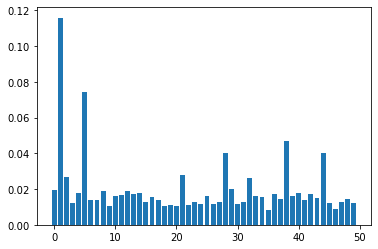

In [112]:
 features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

In [ ]:
 X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [ ]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

In [ ]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')